## Analyzing the backtest results

In [3]:
import logging
import os
import re
from kiteconnect import KiteConnect
from dotenv import load_dotenv
load_dotenv()
import bs_threading
from matplotlib import pyplot
import importlib
import time
from datetime import datetime, timedelta, timezone
import dateutil
import pandas as pd
importlib.reload(bs_threading)
from bs_threading import bs_threadify, bs_make_throttle_ready_func, bs_multiprocessify,f


In [4]:
# load all the stocks
# we do it together to the final of the sytem skk

INPUT_KITE_HISTORICAL_DIR = "input/kite_historical"
INPUT_KITE_INSTRUMENTS_DIR = "input/kite_instruments"
BACKTEST_DIR = "output/bsstonks_backtest"

In [29]:
for backtest_strategy_dir in os.listdir(BACKTEST_DIR):
    print(backtest_strategy_dir)

jay_all_rsi_45
jay_tsla_ema_20_60
jay_tsla_rsi_45
rushit_ma_start_20_60_daily_tataall
rushit_ma_start_5_100_daily_tataall


In [30]:
backtest_strategy_dir = "rushit_ma_start_20_60_daily_tataall"
strategy_symbol_summary = []
for backtest_symbol_file in os.listdir(os.path.join(BACKTEST_DIR,backtest_strategy_dir)):
    print("---------------------")
    print(backtest_symbol_file)
    df = pd.read_csv(os.path.join(BACKTEST_DIR, backtest_strategy_dir, backtest_symbol_file))
    start_balance = df[df['buysell']=='sell'].iloc[0]['balance']
    end_balance = df[df['buysell']=='sell'].iloc[-1]['balance']
    pnl = (end_balance-100000)
    pnl_multiplier = pnl/100000
    print(pnl_multiplier)
    start_date = dateutil.parser.parse(df['date'].iloc[0])
    end_date = dateutil.parser.parse(df['date'].iloc[-1])
    span_days = (end_date-start_date).days
    
    pnl_percentage_multiplier_per_year = (pnl_multiplier-1)*100/span_days*365
    strategy_symbol_summary.append({
        'symbol':backtest_symbol_file,
        'p&l % per year': pnl_percentage_multiplier_per_year,
        'p&l %':(pnl_multiplier-1)*100,
        'p&l': pnl, 
        'trades': df.shape[0]/2
    })
#     print("100000", start_balance, end_balance)
#     print("P&L --> ", )


---------------------
114433_TATASTLBSL_EQ_NSE_NSE_day.csv
-0.09142991315944819
---------------------
136330244_TCS_EQ_BSE_BSE_day.csv
-0.3720149073003058
---------------------
185345_TATACOFFEE_EQ_NSE_NSE_day.csv
-0.07622367079020638
---------------------
2006529_NETF_EQ_NSE_NSE_day.csv
0.070612000085498
---------------------
2031873_TATASTLLP-BE_EQ_NSE_NSE_day.csv
0.09497108998412354
---------------------
2293249_TTML-BE_EQ_NSE_NSE_day.csv
-0.582210534629284
---------------------
2953217_TCS_EQ_NSE_NSE_day.csv
0.3607213349420982
---------------------
3322369_NPBET_EQ_NSE_NSE_day.csv
0.15356523739322278
---------------------
414977_TATAINVEST_EQ_NSE_NSE_day.csv
0.14013433995989558
---------------------
4343041_TATAMTRDVR_EQ_NSE_NSE_day.csv
-0.47850907459112196
---------------------
871681_TATACHEM_EQ_NSE_NSE_day.csv
-0.4796423940338156
---------------------
873217_TATAELXSI_EQ_NSE_NSE_day.csv
0.15986673691814604
---------------------
876289_TATAMETALI_EQ_NSE_NSE_day.csv
3.443657894827

In [31]:
print("Strategy:", backtest_strategy_dir)
df_symbol_summary = pd.DataFrame(strategy_symbol_summary)
print(df_symbol_summary.columns)
df_symbol_summary.sort_values(by=["p&l % per year"], ascending=False).head(50)


Strategy: rushit_ma_start_20_60_daily_tataall
Index(['symbol', 'p&l % per year', 'p&l %', 'p&l', 'trades'], dtype='object')


,symbol,p&l % per year,p&l %,p&l,trades
12,876289_TATAMETALI_EQ_NSE_NSE_day.csv,48.792950,244.365789,344365.789483,12.5
14,878593_TATACONSUM_EQ_NSE_NSE_day.csv,16.721505,84.615397,184615.396968,11.5
17,952577_TATACOMM_EQ_NSE_NSE_day.csv,12.061927,71.611493,171611.493336,12.5
16,895745_TATASTEEL_EQ_NSE_NSE_day.csv,5.948379,28.845563,128845.563161,7.5
6,2953217_TCS_EQ_NSE_NSE_day.csv,-11.042911,-63.927867,36072.133494,17.5
8,414977_TATAINVEST_EQ_NSE_NSE_day.csv,-15.771405,-85.986566,14013.433996,14.5
11,873217_TATAELXSI_EQ_NSE_NSE_day.csv,-19.334719,-84.013326,15986.673692,6.5
4,2031873_TATASTLLP-BE_EQ_NSE_NSE_day.csv,-19.863834,-90.502891,9497.108998,9.5
2,185345_TATACOFFEE_EQ_NSE_NSE_day.csv,-22.006815,-107.622367,-7622.367079,12.5
1,136330244_TCS_EQ_BSE_BSE_day.csv,-23.700210,-137.201491,-37201.490730,17.5


---------------------
114433_TATASTLBSL_EQ_NSE_NSE_day.csv
losses (12,)
profit (5,)


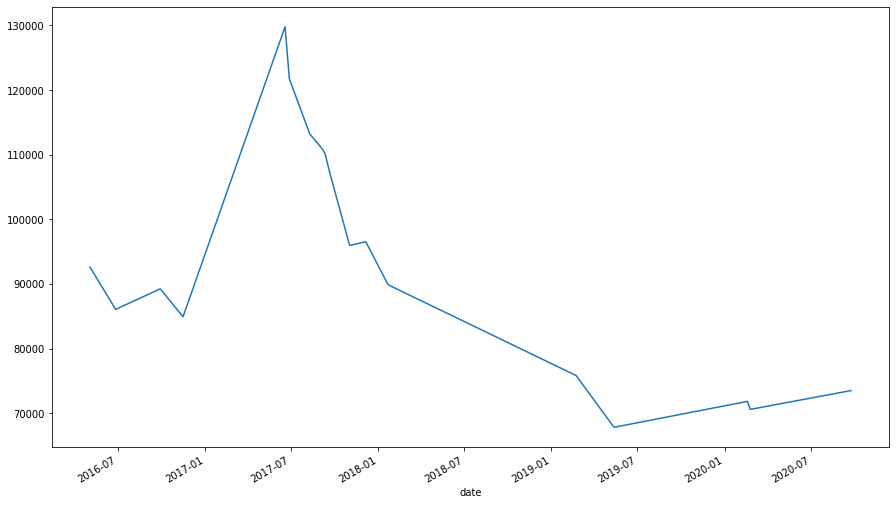

---------------------
136330244_TCS_EQ_BSE_BSE_day.csv
losses (16,)
profit (3,)


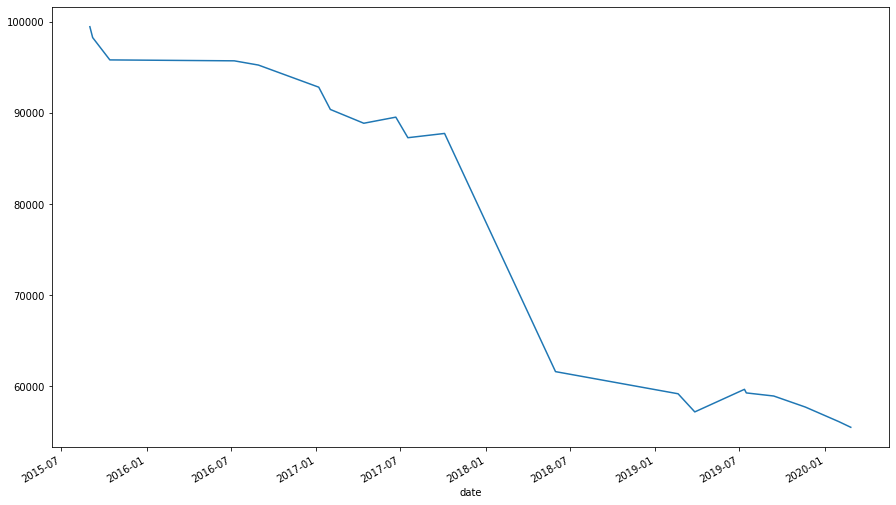

---------------------
185345_TATACOFFEE_EQ_NSE_NSE_day.csv
losses (8,)
profit (6,)


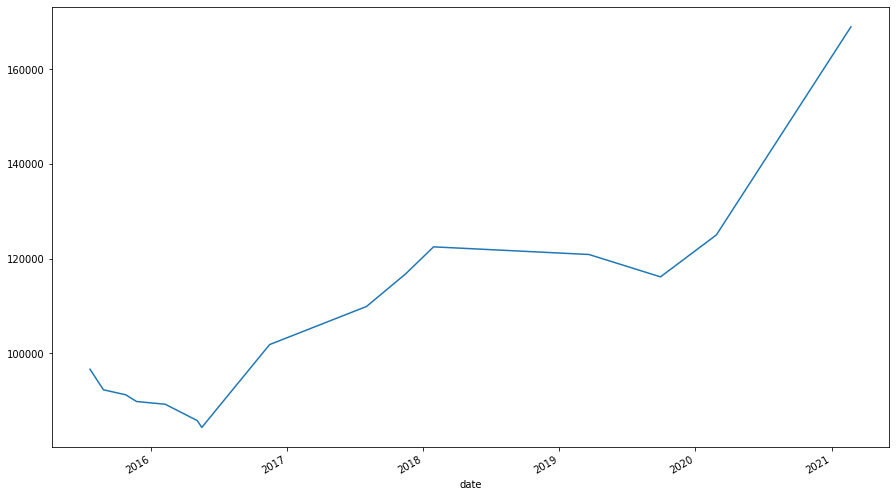

---------------------
2006529_NETF_EQ_NSE_NSE_day.csv
losses (0,)
profit (1,)


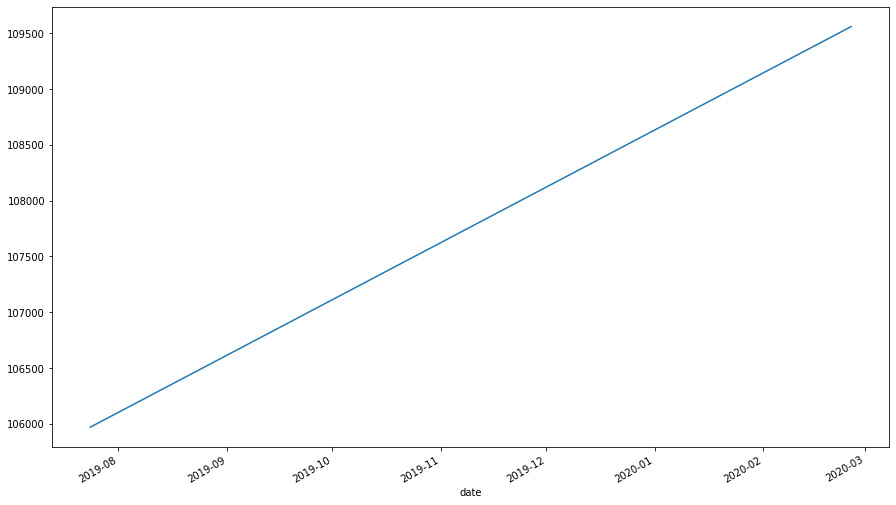

---------------------
2031873_TATASTLLP-BE_EQ_NSE_NSE_day.csv
losses (6,)
profit (3,)


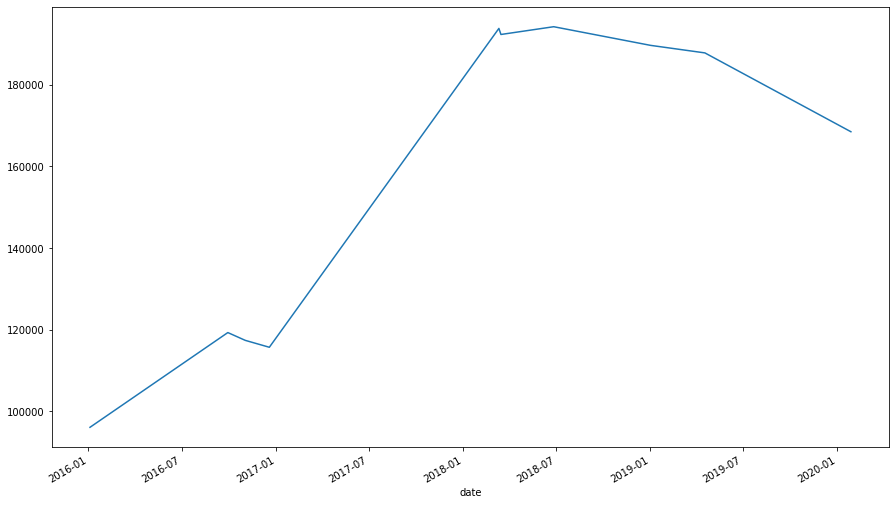

---------------------
2293249_TTML-BE_EQ_NSE_NSE_day.csv
losses (21,)
profit (4,)


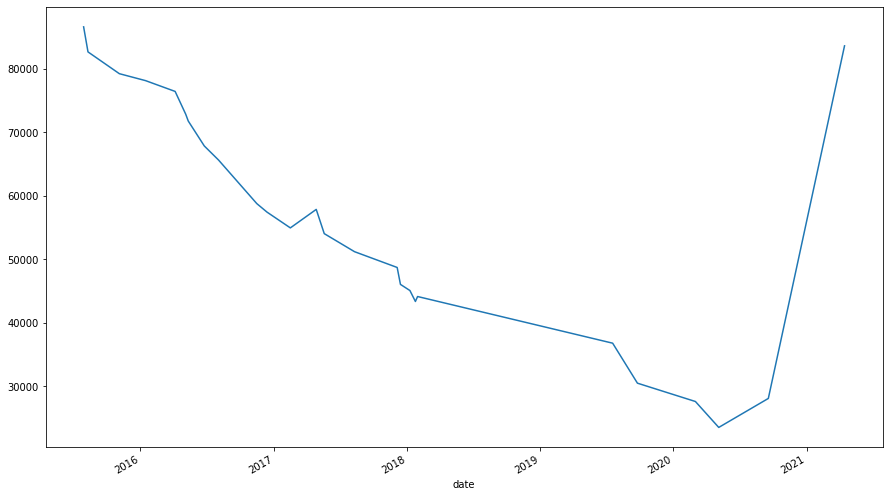

---------------------
2953217_TCS_EQ_NSE_NSE_day.csv
losses (12,)
profit (6,)


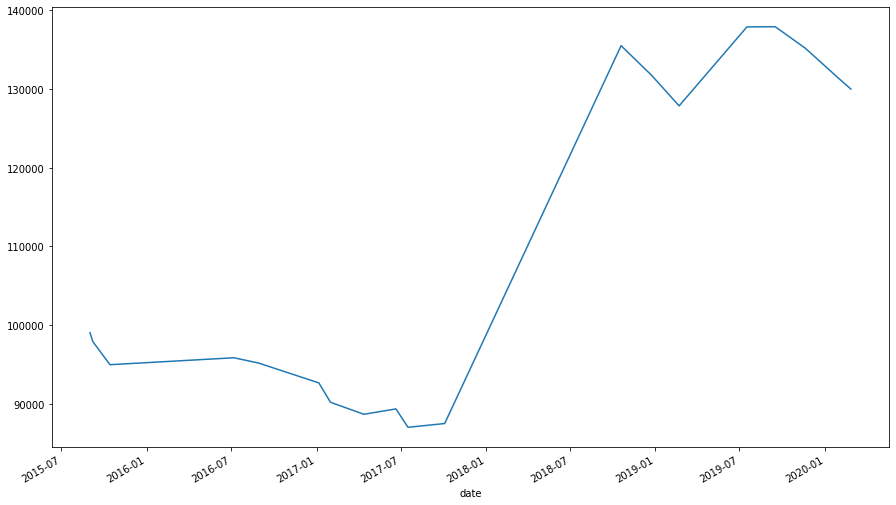

---------------------
3322369_NPBET_EQ_NSE_NSE_day.csv
losses (3,)
profit (2,)


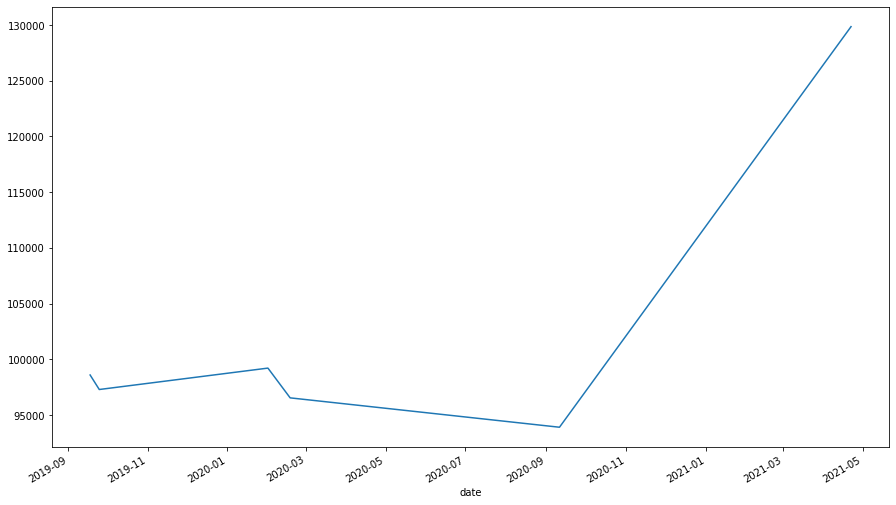

---------------------
414977_TATAINVEST_EQ_NSE_NSE_day.csv
losses (12,)
profit (6,)


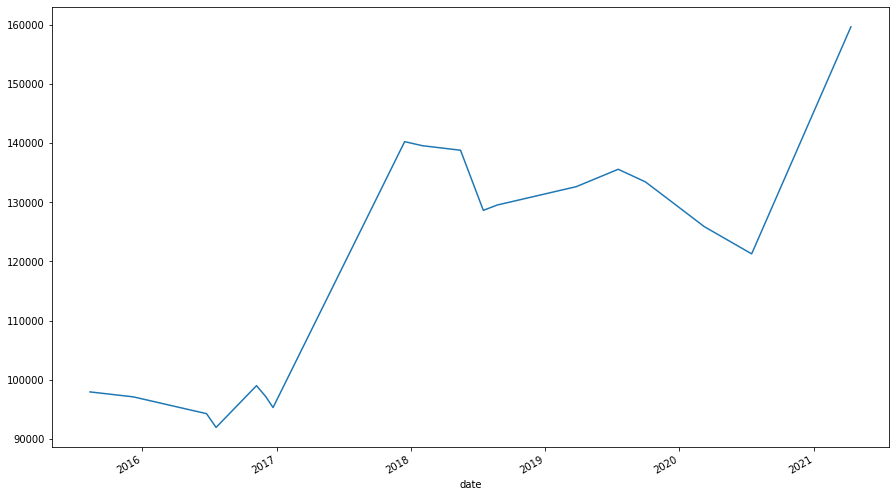

---------------------
4343041_TATAMTRDVR_EQ_NSE_NSE_day.csv
losses (8,)
profit (2,)


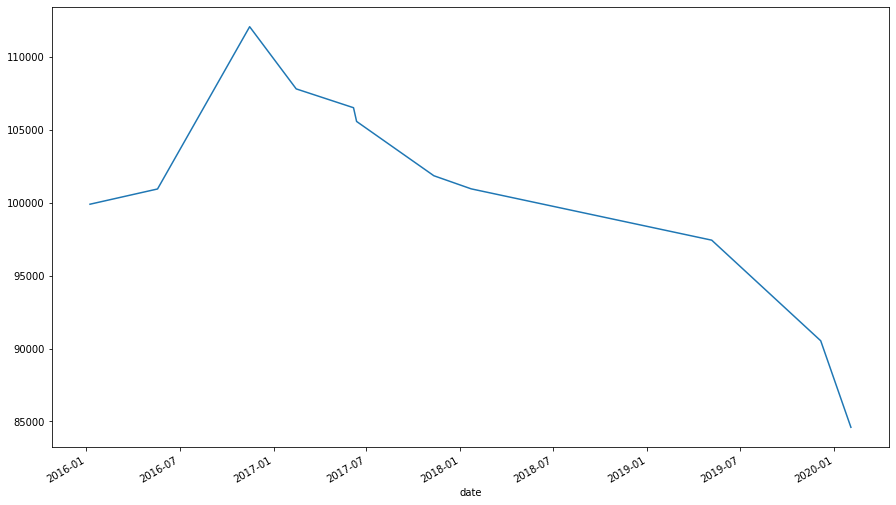

---------------------
871681_TATACHEM_EQ_NSE_NSE_day.csv
losses (10,)
profit (5,)


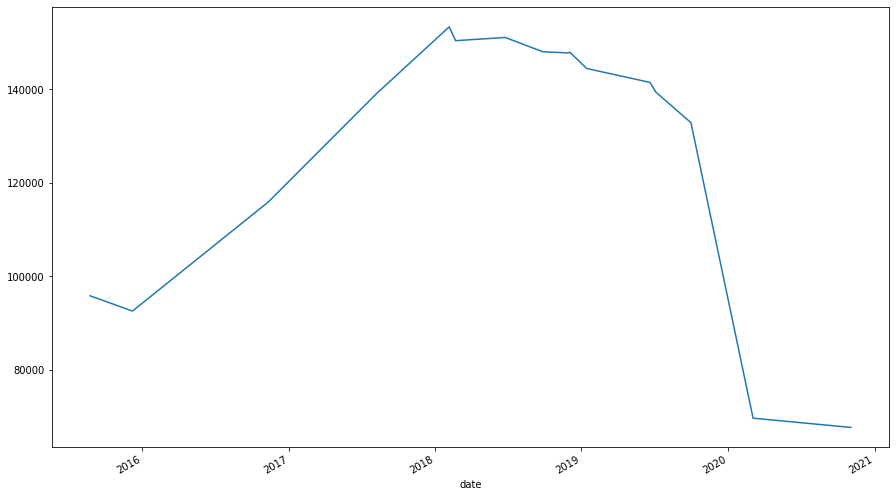

---------------------
873217_TATAELXSI_EQ_NSE_NSE_day.csv
losses (5,)
profit (3,)


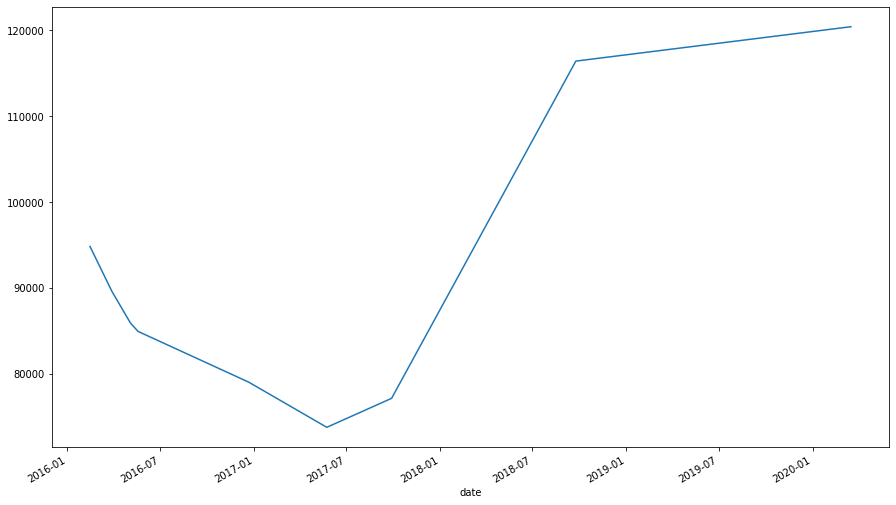

---------------------
876289_TATAMETALI_EQ_NSE_NSE_day.csv
losses (16,)
profit (4,)


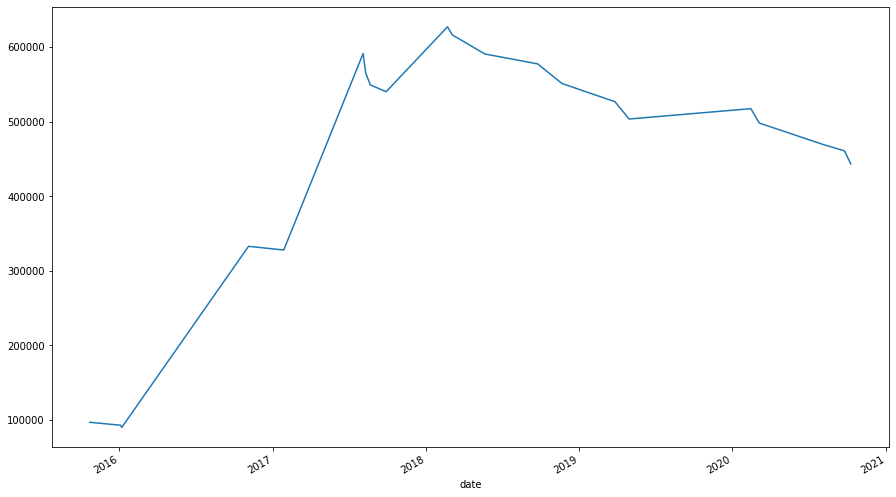

---------------------
877057_TATAPOWER_EQ_NSE_NSE_day.csv
losses (15,)
profit (3,)


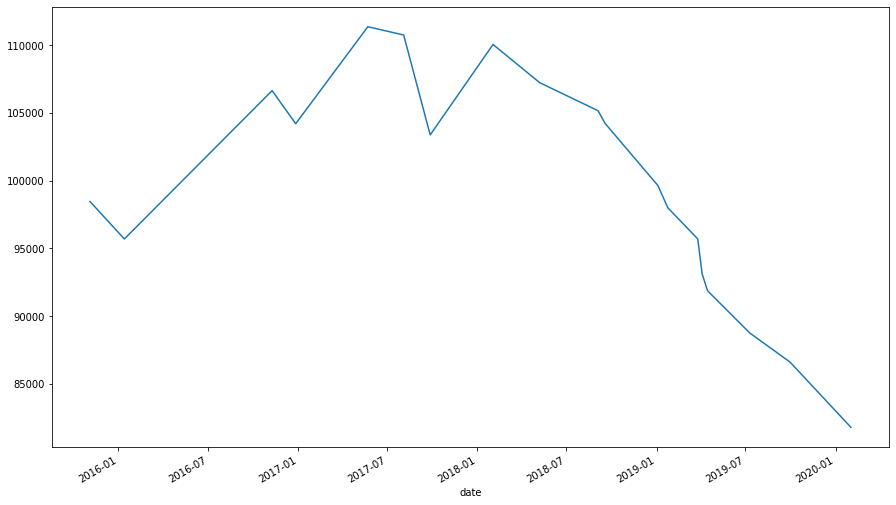

---------------------
878593_TATACONSUM_EQ_NSE_NSE_day.csv
losses (8,)
profit (3,)


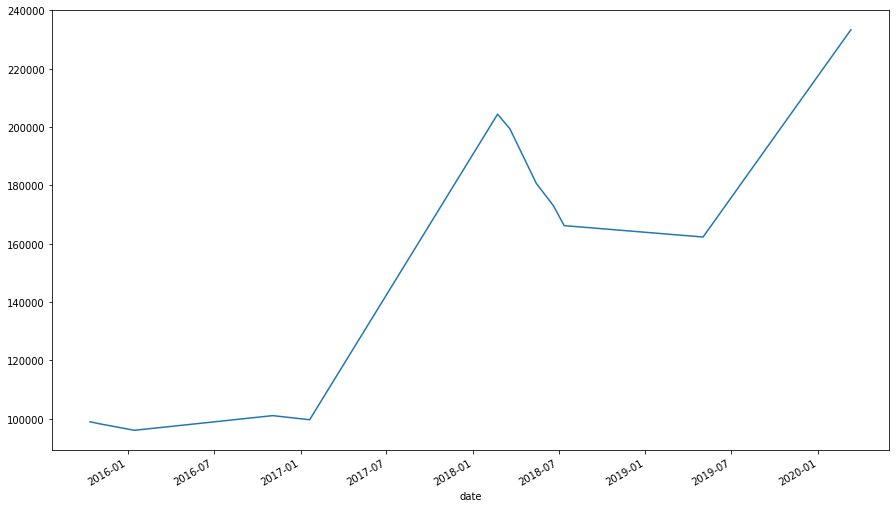

---------------------
884737_TATAMOTORS_EQ_NSE_NSE_day.csv
losses (12,)
profit (2,)


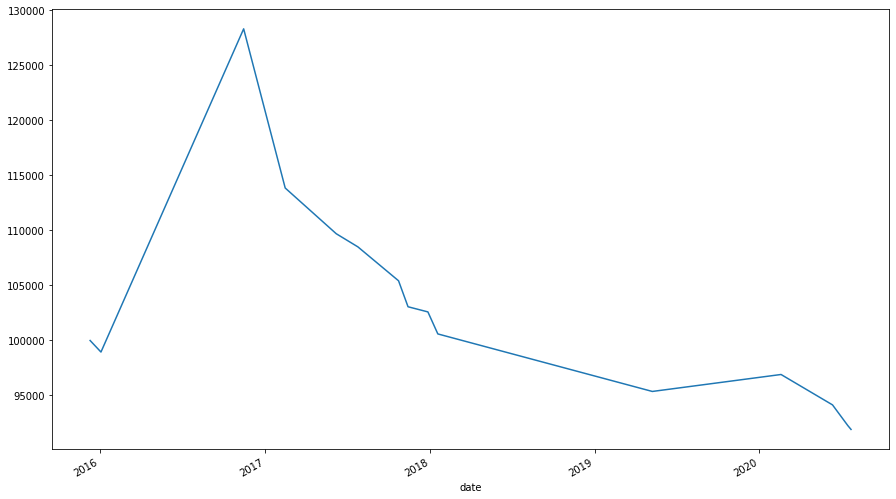

---------------------
895745_TATASTEEL_EQ_NSE_NSE_day.csv
losses (8,)
profit (4,)


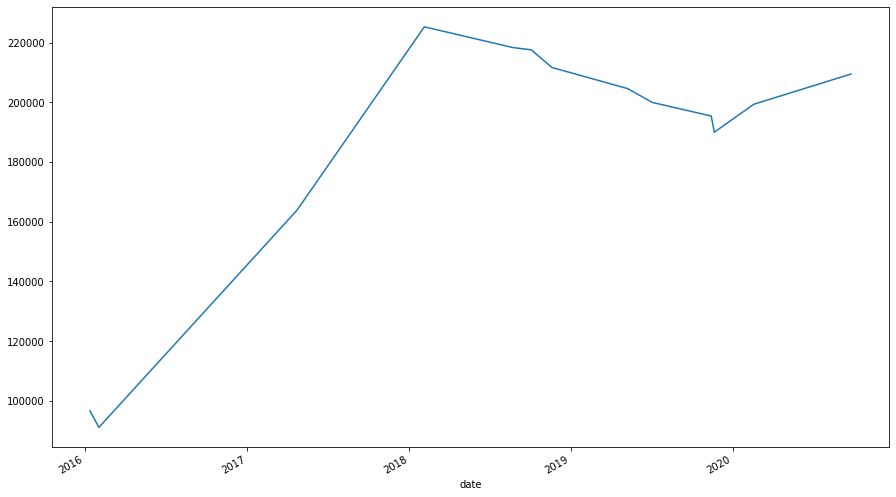

---------------------
952577_TATACOMM_EQ_NSE_NSE_day.csv
losses (13,)
profit (4,)


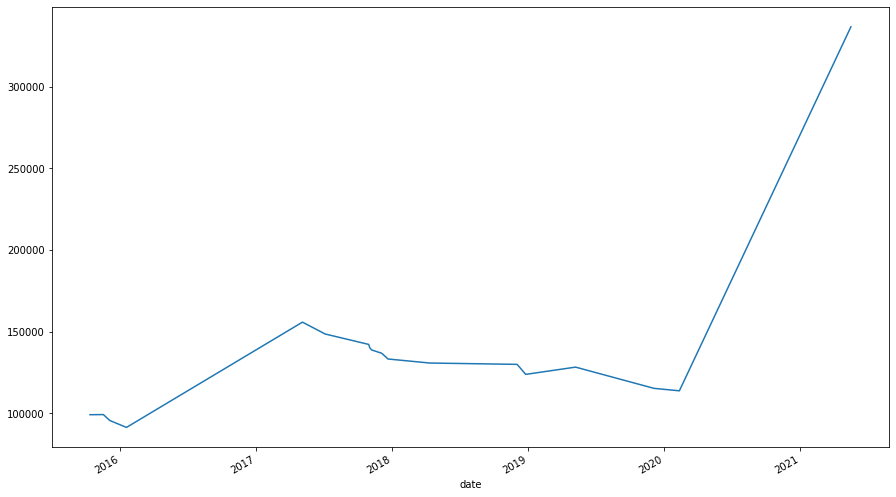

In [28]:
top_profits = df_symbol_summary.sort_values(by=["p&l % per year"], ascending=False).head(40)['symbol'].values
for backtest_symbol_file in os.listdir(os.path.join(BACKTEST_DIR,backtest_strategy_dir)):
    
    
    if backtest_symbol_file not in top_profits:
        continue
    print("---------------------")
    print(backtest_symbol_file)
    df = pd.read_csv(os.path.join(BACKTEST_DIR, backtest_strategy_dir, backtest_symbol_file), index_col="date", parse_dates=True, date_parser=dateutil.parser.parse)
#     df.index_col = 0
#     df.date.astype("datetime")
    df[df['buysell']=='sell']['balance'].plot(figsize=(15,9))
    
    porl = df[df['buysell']=='sell']['balance'].diff()
    print("losses", porl[porl<0].shape)
    print("profit", porl[porl>0].shape)
    pyplot.show()

In [44]:
porl

date
2019-07-05 11:15:00+05:30             NaN
2019-07-05 12:45:00+05:30      255.232606
2019-07-09 12:15:00+05:30       81.889052
2019-07-09 13:15:00+05:30       80.968953
2019-07-09 13:45:00+05:30       53.659333
                                 ...     
2021-06-14 09:15:00+05:30    11025.935704
2021-06-16 09:45:00+05:30    24464.344755
2021-06-16 15:00:00+05:30      783.508915
2021-06-18 09:30:00+05:30     6306.682935
2021-06-18 12:45:00+05:30     5536.272729
Name: balance, Length: 454, dtype: float64